[View in Colaboratory](https://colab.research.google.com/github/anirbanghoshsbi/Bio-medical-Imaging/blob/master/Medical_Imaging_Zurich.ipynb)

In [0]:
import numpy as np

In [0]:
import pandas as pd
basic_image = np.random.choice(range(100),size =(5,5))
xx , yy = np.meshgrid(range(basic_image.shape[1]),range(basic_image.shape[0]))

In [0]:
image_df = pd.DataFrame(dict(x=xx.ravel(),y=yy.ravel(), Intensity = basic_image.ravel()))

**flatten** always returns a copy.
**ravel** returns a view of the original array whenever possible. This isn't visible in the printed output, but if you modify the array returned by ravel, it may modify the entries in the original array. If you modify the entries in an array returned from flatten this will never happen. ravel will often be faster since no memory is copied, but you have to be more careful about modifying the array it returns

In [7]:
image_df[['x','y','Intensity']].head(5)

,x,y,Intensity
0,0,0,59
1,1,0,64
2,2,0,28
3,3,0,6
4,4,0,86


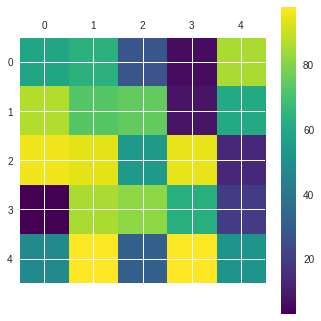

In [9]:
import matplotlib.pyplot as plt
plt.matshow(basic_image , cmap = 'viridis')
plt.colorbar()

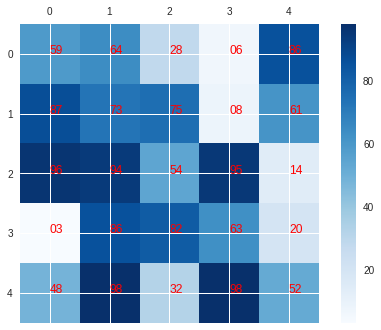

In [13]:
fig , ax1 = plt.subplots(1,1)
plot_image = ax1.matshow(basic_image , cmap="Blues")
plt.colorbar(plot_image)
for _ ,c_row in image_df.iterrows():
  ax1.text(c_row['x'],c_row['y'],s = '%02d' % c_row['Intensity'] , fontdict = dict(color='r'))
  

**We can define how we want to visualize the image**
as given in the code snippets below

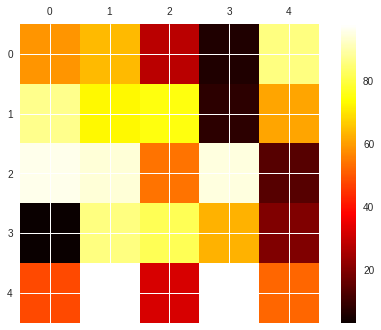

In [15]:
fig , ax1 = plt.subplots(1,1)
plot_image = ax1.matshow(basic_image , cmap='hot')
plt.colorbar(plot_image)

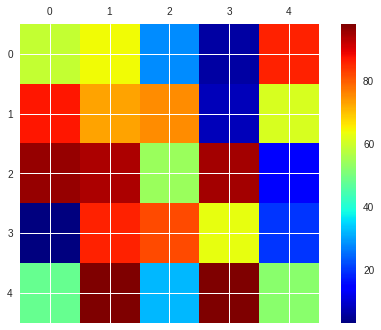

In [17]:
fig , ax1 = plt.subplots(1,1)
plot_image = ax1.matshow(basic_image , cmap='jet')
plt.colorbar(plot_image)

**Lookup Tables**
Formally a lookup table is a function which
f(Intensity)→Color

Text(0,0.5,'Red Component')

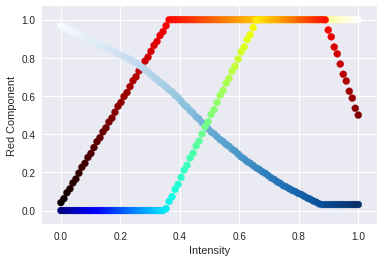

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xlin = np.linspace(0, 1, 100)
fig, ax1 = plt.subplots(1,1)
ax1.scatter(xlin, 
            plt.cm.hot(xlin)[:,0], 
            c = plt.cm.hot(xlin))
ax1.scatter(xlin, 
            plt.cm.Blues(xlin)[:,0], 
            c = plt.cm.Blues(xlin))

ax1.scatter(xlin, 
            plt.cm.jet(xlin)[:,0], 
            c = plt.cm.jet(xlin))

ax1.set_xlabel('Intensity')
ax1.set_ylabel('Red Component')

Text(0,0.5,'Red Component')

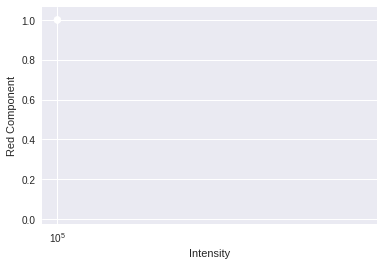

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
xlin = np.logspace(-2, 5, 500)
log_xlin = np.log10(xlin)
norm_xlin = (log_xlin-log_xlin.min())/(log_xlin.max()-log_xlin.min())
fig, ax1 = plt.subplots(1,1)

ax1.scatter(xlin, 
            plt.cm.hot(norm_xlin)[:,0], 
            c = plt.cm.hot(norm_xlin))

ax1.scatter(xlin, 
            plt.cm.hot(xlin/xlin.max())[:,0], 
            c = plt.cm.hot(norm_xlin))
ax1.set_xscale('log')
ax1.set_xlabel('Intensity')
ax1.set_ylabel('Red Component')

In [25]:
import numpy as np
vol_image = np.arange(27).reshape((3,3,3))
vol_image

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

[[ 0  1  2  9 10 11]
 [ 3  4  5 12 13 14]
 [ 6  7  8 15 16 17]
 [18 19 20  0  0  0]
 [21 22 23  0  0  0]
 [24 25 26  0  0  0]]


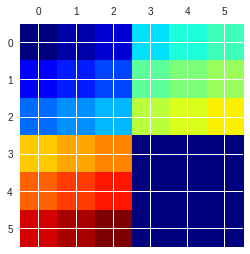

In [33]:
# We can reshape from table to array using the code snippet
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.util.montage import montage2d
print(montage2d(vol_image, fill = 0))
plt.matshow(montage2d(vol_image, fill = 0), cmap = 'jet')

In [34]:
import pandas as pd
from itertools import product
import numpy as np
base_df = pd.DataFrame([dict(x=x,y=y) for x,y in product(range(5), range(5))])
base_df

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
5,1,0
6,1,1
7,1,2
8,1,3
9,1,4


In [36]:
base_df['Intensity']= np.random.uniform(0,1,25)
base_df['Transparency']=np.random.uniform(0,1,25)
base_df.head(5)

,x,y,Intensity,Transparency
0,0,0,0.447351,0.309252
1,0,1,0.456069,0.409613
2,0,2,0.077922,0.375520
3,0,3,0.351005,0.106735
4,0,4,0.926472,0.167109


Text(0.5,1,'Transparency')

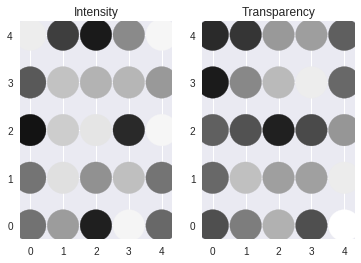

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(base_df['x'], base_df['y'], c = plt.cm.gray(base_df['Intensity']), s = 1000)
ax1.set_title('Intensity')
ax2.scatter(base_df['x'], base_df['y'], c = plt.cm.gray(base_df['Transparency']), s = 1000)
ax2.set_title('Transparency')

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [52]:
from IPython.display import SVG
from keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import model_to_dot 
resnet = ResNet50(weights = None)
SVG(model_to_dot(resnet).create_svg())

ImportError: ignored